In [1]:
# Code for Variational Autoencoders trained on MNIST
# Perform imports and load the dataset
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data')

/home/jishnu/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
# Defining the input and output data
tf.reset_default_graph()

batch_size = 64

X_in = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28], name='X')
Y = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28], name='Y')
Y_flat = tf.reshape(Y, shape=[-1, 28 * 28])
keep_prob = tf.placeholder(dtype=tf.float32, shape=(), name='keep_prob')

dec_in_channels = 1
n_latent = 8

reshaped_dim = [-1, 7, 7, dec_in_channels]
inputs_decoder = 49 * dec_in_channels / 2

def lrelu(x, alpha=0.3):
    return tf.maximum(x, tf.multiply(x, alpha))

In [7]:
# Defining the encoder

def encoder(X_in, keep_prob):
    activation=lrelu
    with tf.variable_scope("encoder", reuse=None):
        X = tf.reshape(X_in, shape=[-1, 28, 28, 1])
        x = tf.layers.conv2d(X, filters=64, kernel_size=4, strides=2, padding='same', activation=activation)
        x = tf.nn.dropout(x, keep_prob)
        x = tf.layers.conv2d(x, filters=64, kernel_size=4, strides=2, padding='same', activation=activation)
        x = tf.nn.dropout(x, keep_prob)
        x = tf.layers.conv2d(x, filters=64, kernel_size=4, strides=1, padding='same', activation=activation)
        x = tf.nn.dropout(x, keep_prob)
        x = tf.contrib.layers.flatten(x)
        mn = tf.layers.dense(x, units=n_latent)
        sd = 0.5 * tf.layers.dense(x, units=n_latent)
        epsilon = tf.random_normal(tf.stack([tf.shape(x)[0], n_latent]))
        z = mn + tf.multiply(epsilon, tf.exp(sd))
        
        return z, mn, sd

In [8]:
# Defining the decoder

def decoder(sampled_z, keep_prob):
    with tf.variable_scope("decoder", reuse=None):
        x = tf.layers.dense(sampled_z, units=inputs_decoder, activation=lrelu)
        x = tf.layers.dense(x, units=inputs_decoder * 2 + 1, activation=lrelu)
        x = tf.reshape(x, reshaped_dim)
        x = tf.layers.conv2d_transpose(x, filters=64, kernel_size=4, strides=2, padding='same', activation=tf.nn.relu)
        x = tf.nn.dropout(x, keep_prob)
        x = tf.layers.conv2d_transpose(x, filters=64, kernel_size=4, strides=1, padding='same', activation=tf.nn.relu)
        x = tf.nn.dropout(x, keep_prob)
        x = tf.layers.conv2d_transpose(x, filters=64, kernel_size=4, strides=1, padding='same', activation=tf.nn.relu)
        
        x = tf.contrib.layers.flatten(x)
        x = tf.layers.dense(x, units=28*28, activation=tf.nn.sigmoid)
        img = tf.reshape(x, shape=[-1, 28, 28])
        return img

In [9]:
# Wiring together both the parts
sampled, mn, sd = encoder(X_in, keep_prob)
dec = decoder(sampled, keep_prob)

In [10]:
# Computing losses and enforcing Gaussian latent distribution
unreshaped = tf.reshape(dec, [-1, 28*28])
img_loss = tf.reduce_sum(tf.squared_difference(unreshaped, Y_flat), 1)
latent_loss = -0.5 * tf.reduce_sum(1.0 + 2.0 * sd - tf.square(mn) - tf.exp(2.0 * sd), 1)
loss = tf.reduce_mean(img_loss + latent_loss)
optimizer = tf.train.AdamOptimizer(0.0005).minimize(loss)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

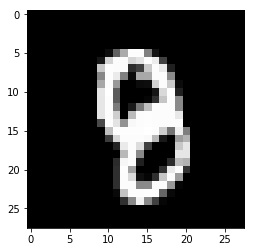

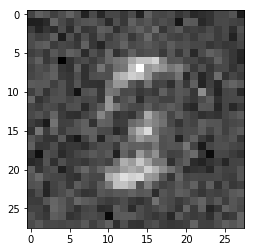

(0, 170.31747, 170.31154, 0.005940558)


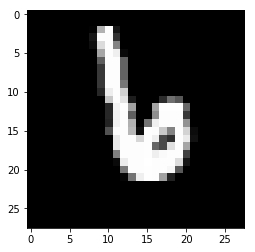

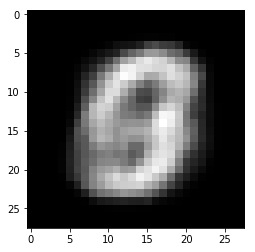

(200, 47.329853, 45.771736, 1.5581187)


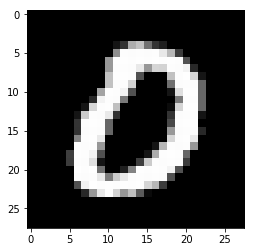

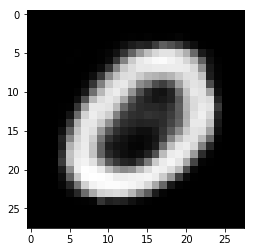

(400, 39.947376, 33.910976, 6.0364)


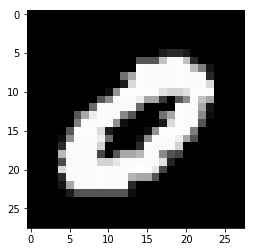

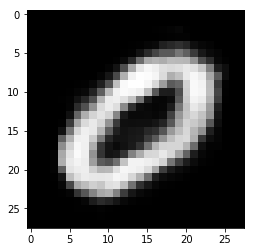

(600, 32.585262, 24.633436, 7.9518256)


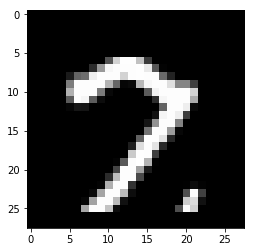

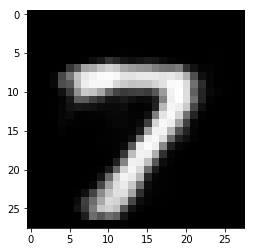

(800, 33.709755, 25.357767, 8.35199)


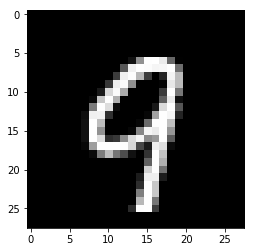

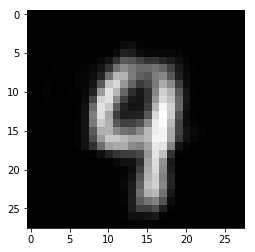

(1000, 32.583153, 24.144596, 8.438557)


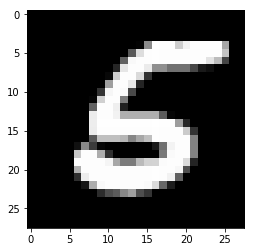

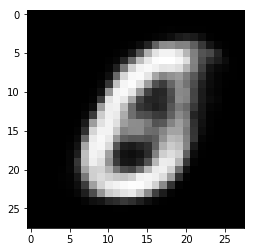

(1200, 30.954655, 22.703691, 8.250961)


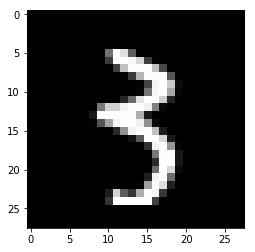

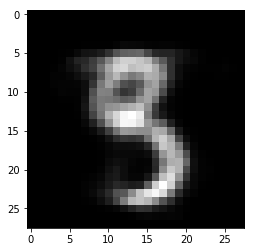

(1400, 30.649725, 21.494652, 9.155073)


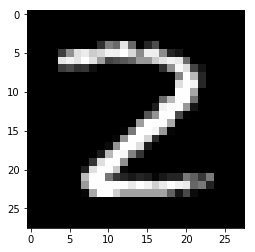

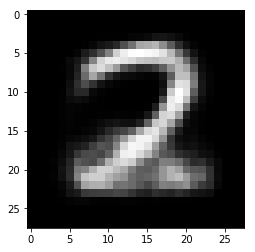

(1600, 33.1996, 24.263197, 8.936401)


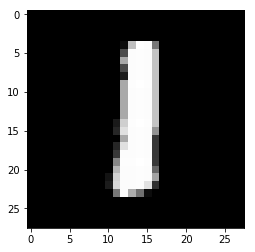

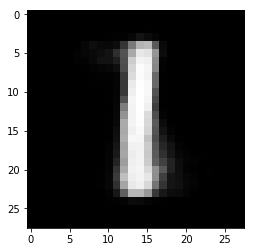

(1800, 31.48036, 22.965761, 8.514599)


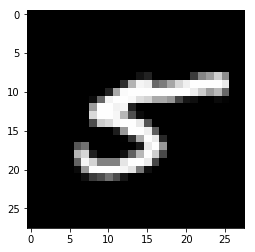

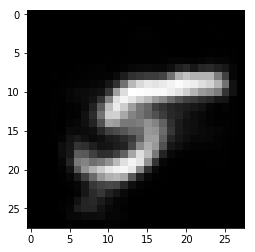

(2000, 32.25147, 22.646664, 9.604806)


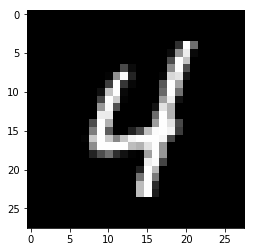

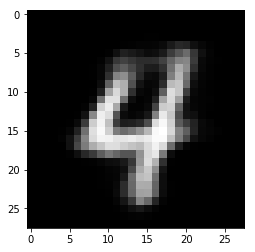

(2200, 31.476727, 22.2348, 9.241928)


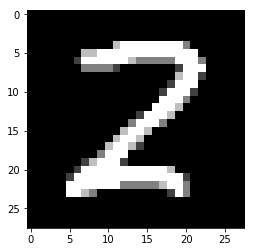

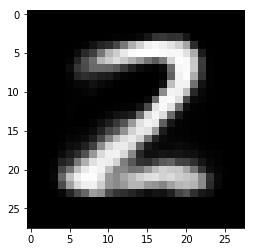

(2400, 33.383522, 23.517605, 9.865915)


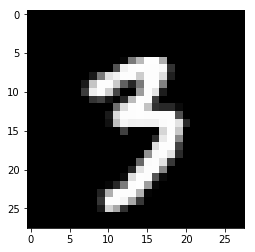

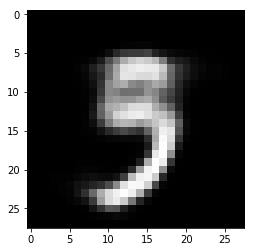

(2600, 30.459604, 20.630064, 9.82954)


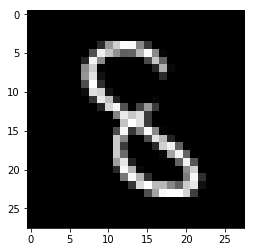

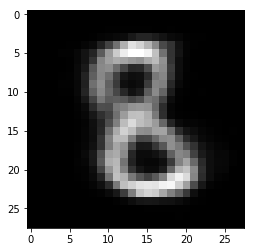

(2800, 32.23654, 23.163147, 9.073397)


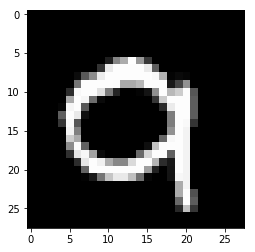

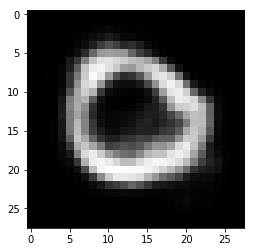

(3000, 32.007736, 21.805925, 10.201809)


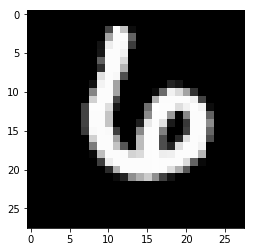

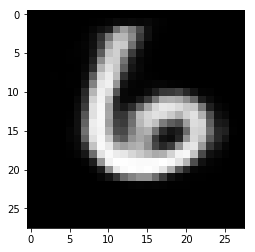

(3200, 31.430077, 22.369942, 9.060134)


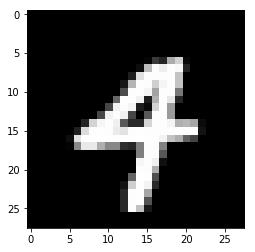

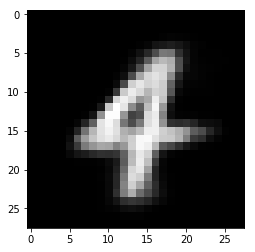

(3400, 30.705551, 21.815987, 8.889564)


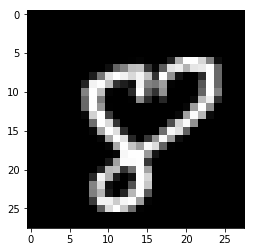

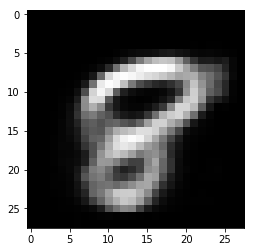

(3600, 30.257893, 21.15198, 9.105913)


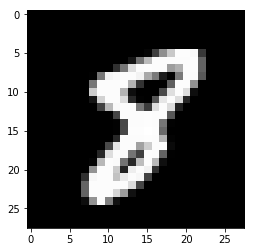

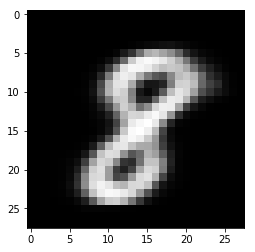

(3800, 30.71328, 20.885654, 9.827626)


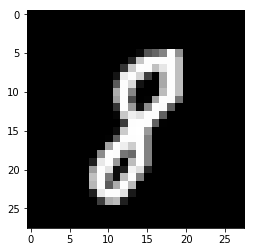

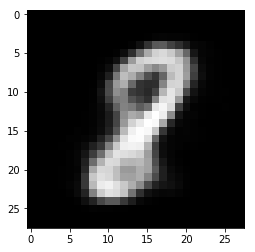

(4000, 28.963509, 19.332287, 9.631222)


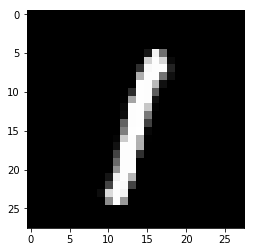

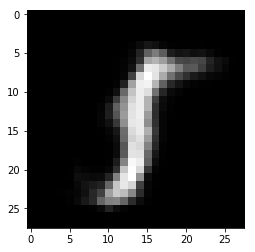

(4200, 31.942923, 21.754272, 10.188651)


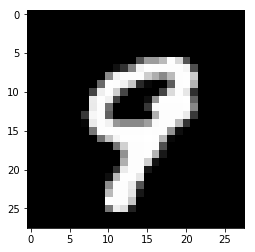

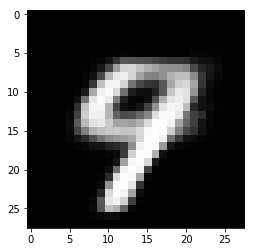

(4400, 28.052853, 18.077644, 9.975206)


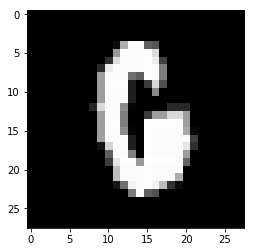

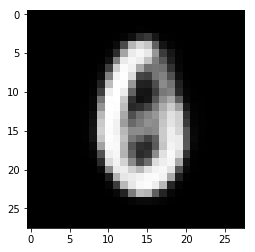

(4600, 29.815891, 20.525013, 9.290878)


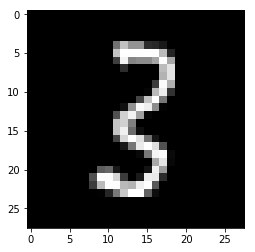

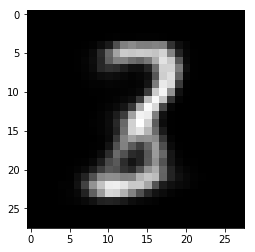

(4800, 30.798668, 20.570385, 10.228285)


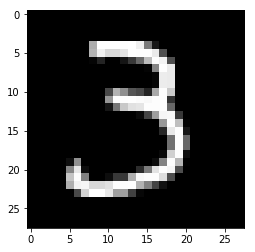

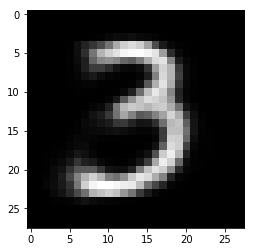

(5000, 29.823215, 20.284922, 9.538293)


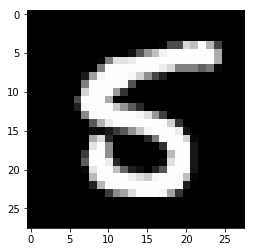

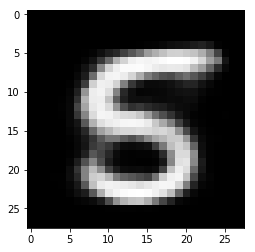

(5200, 28.335178, 18.865543, 9.469637)


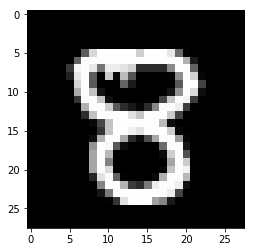

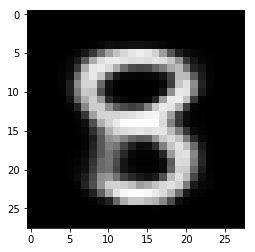

(5400, 29.116812, 19.289726, 9.827087)


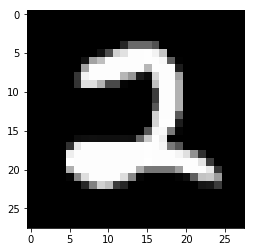

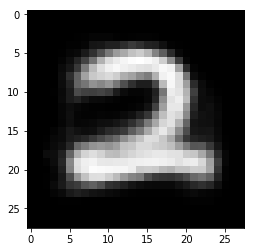

(5600, 28.943092, 19.157305, 9.785787)


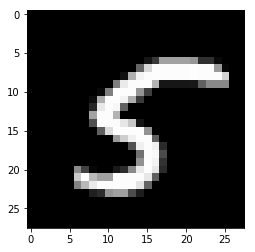

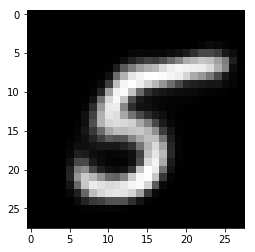

(5800, 29.524185, 19.096846, 10.427341)


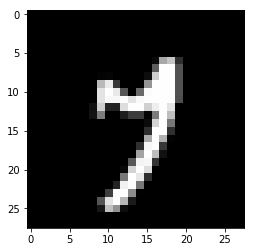

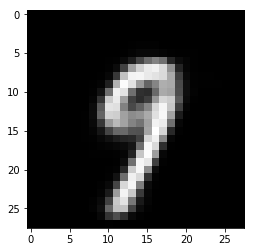

(6000, 27.668293, 17.471252, 10.197039)


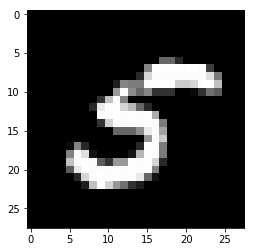

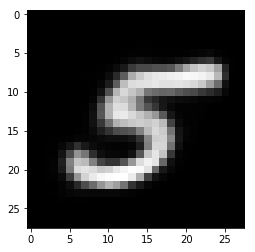

(6200, 28.481833, 18.633852, 9.8479805)


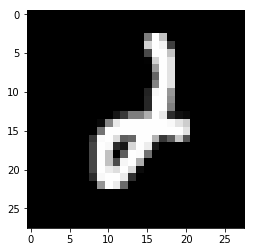

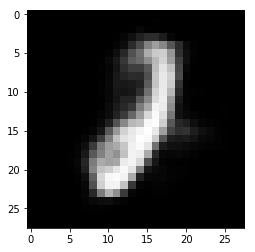

(6400, 28.008385, 18.091927, 9.916458)


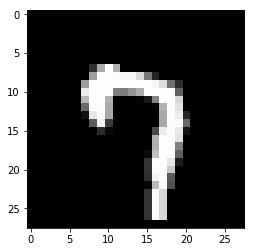

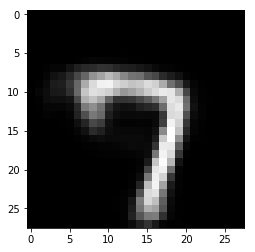

(6600, 29.447853, 18.844755, 10.603098)


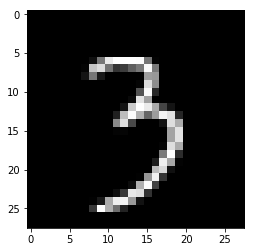

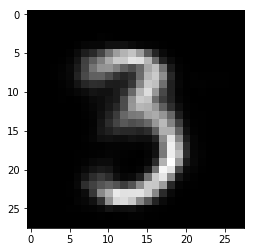

(6800, 28.01908, 17.9175, 10.10158)


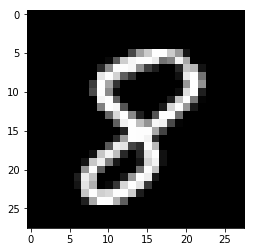

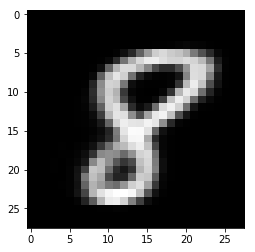

(7000, 29.924767, 19.947762, 9.977005)


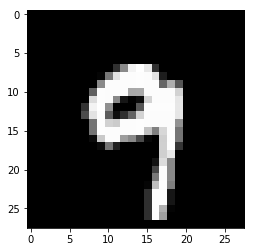

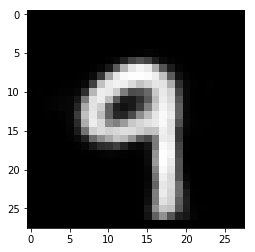

(7200, 27.285973, 17.18597, 10.100002)


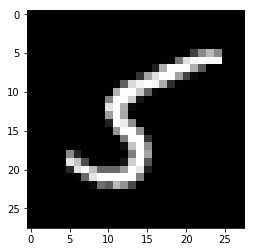

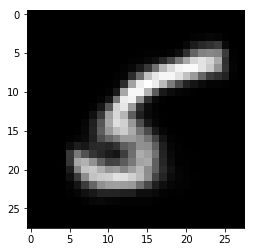

(7400, 28.392992, 18.726763, 9.666231)


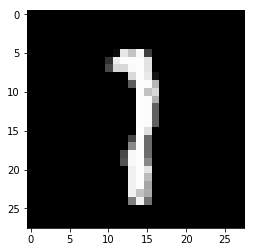

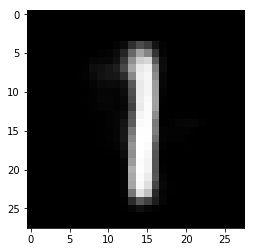

(7600, 27.746933, 18.140043, 9.606892)


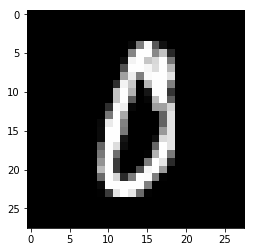

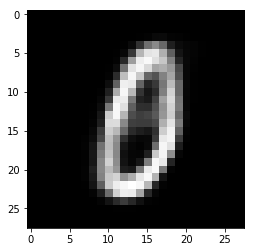

(7800, 29.159294, 19.149395, 10.009899)


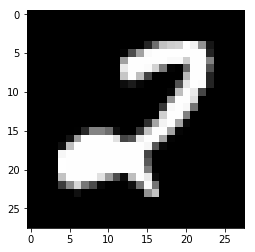

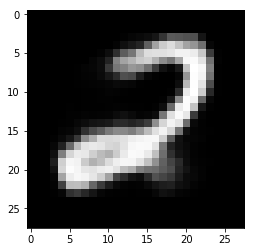

(8000, 27.43961, 17.038465, 10.401145)


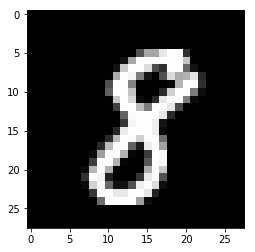

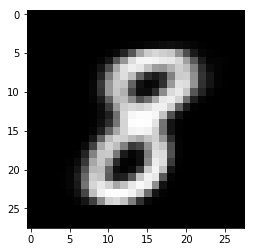

(8200, 26.231586, 15.918921, 10.312665)


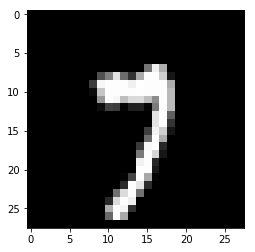

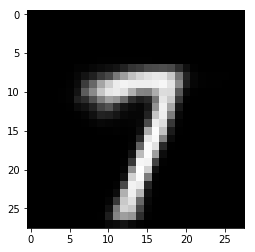

(8400, 28.879013, 18.548553, 10.330458)


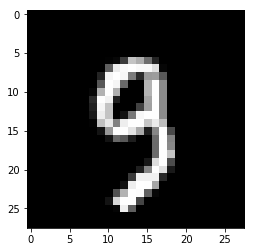

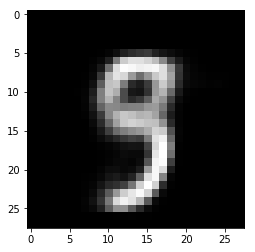

(8600, 27.18601, 16.554798, 10.63121)


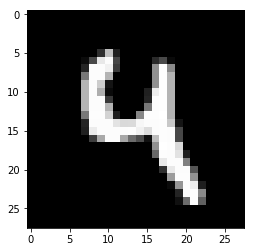

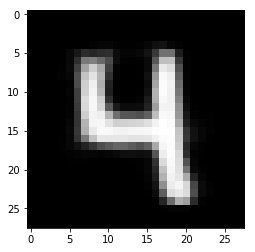

(8800, 28.647621, 18.27062, 10.377002)


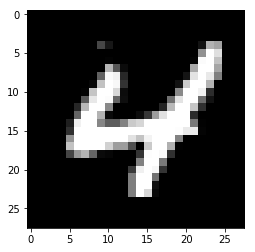

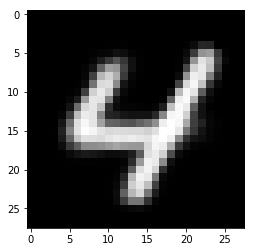

(9000, 26.325956, 16.065851, 10.260103)


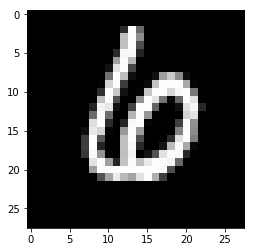

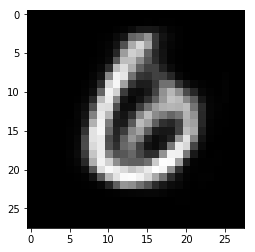

(9200, 28.048662, 18.005196, 10.043467)


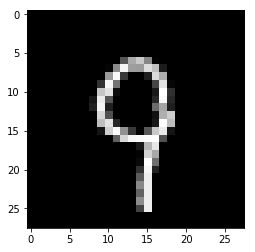

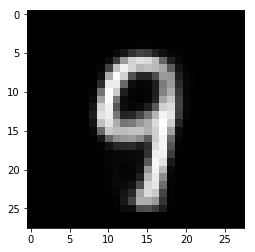

(9400, 27.757935, 17.201916, 10.556021)


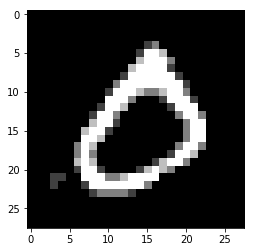

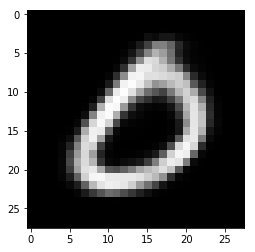

(9600, 29.099586, 18.950848, 10.148741)


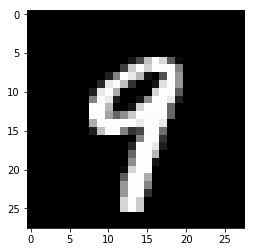

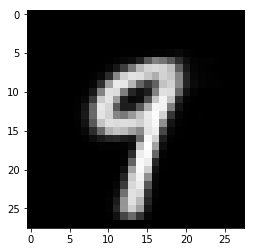

(9800, 27.460669, 17.045006, 10.415663)


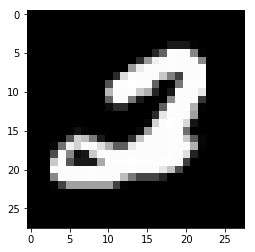

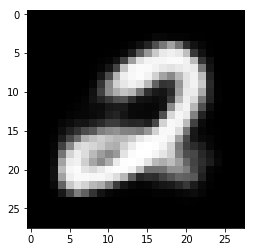

(10000, 27.599302, 17.043816, 10.555487)


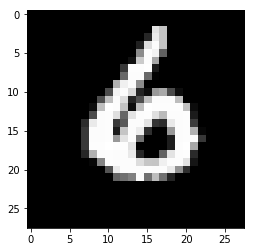

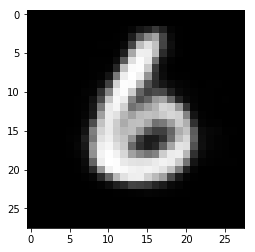

(10200, 26.414326, 16.2316, 10.182726)


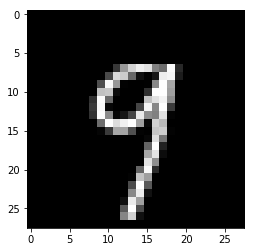

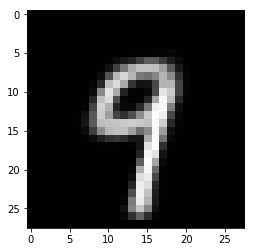

(10400, 27.660648, 17.7365, 9.924147)


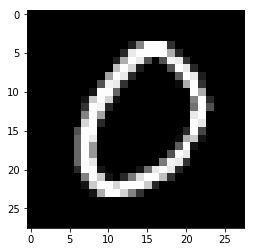

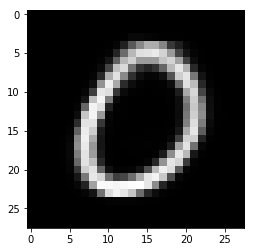

(10600, 27.839163, 17.213833, 10.62533)


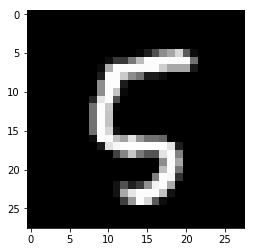

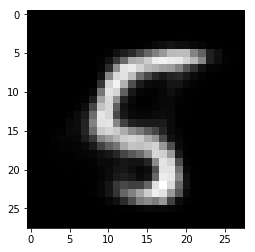

(10800, 28.073978, 17.159922, 10.914057)


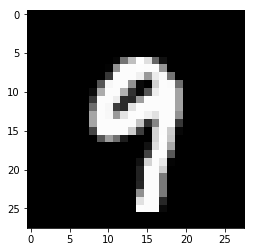

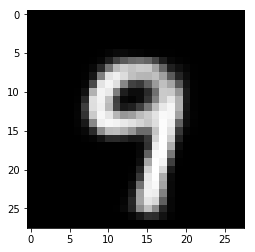

(11000, 28.155828, 17.250607, 10.90522)


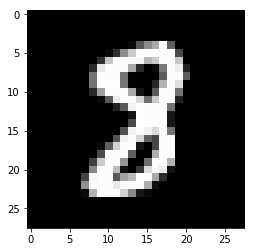

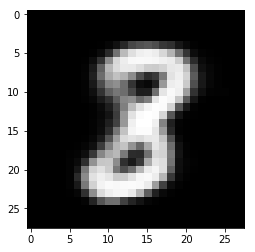

(11200, 29.232946, 17.864613, 11.368334)


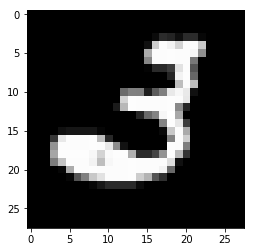

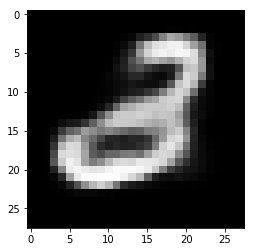

(11400, 28.50156, 18.149286, 10.352274)


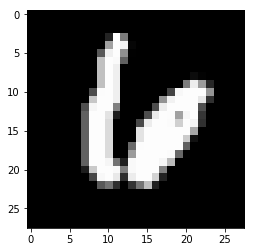

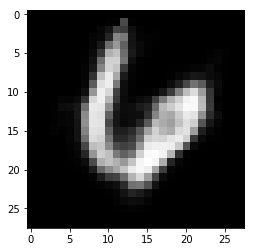

(11600, 29.113539, 18.521534, 10.592007)


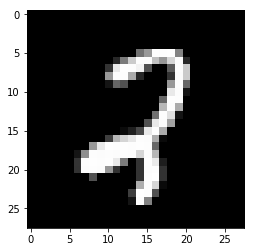

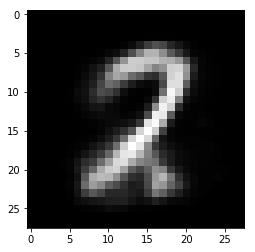

(11800, 29.45347, 19.15306, 10.300409)


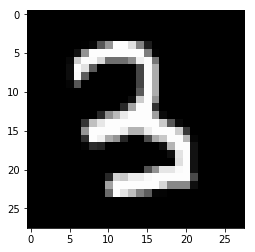

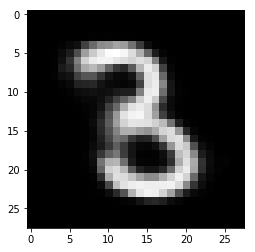

(12000, 28.776398, 18.032558, 10.743838)


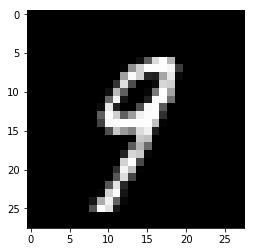

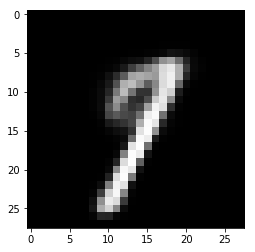

(12200, 27.293228, 16.379429, 10.913802)


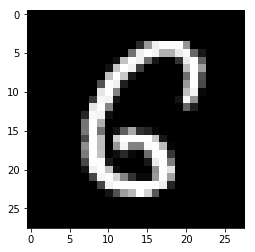

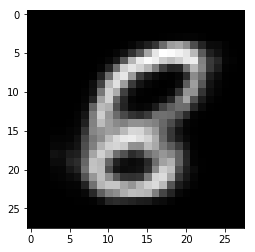

(12400, 28.991686, 18.567032, 10.424654)


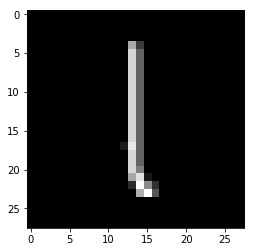

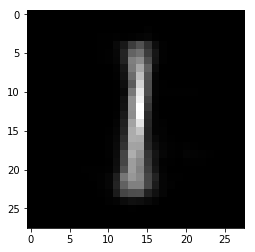

(12600, 29.509981, 19.421745, 10.088236)


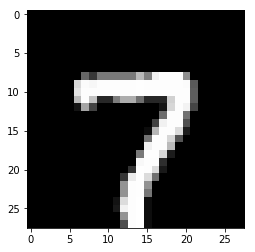

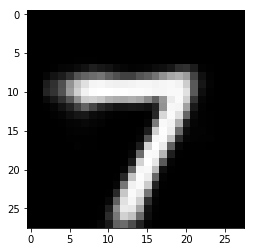

(12800, 28.508093, 18.212704, 10.295391)


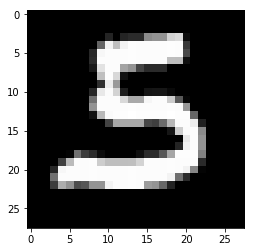

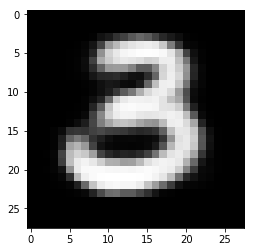

(13000, 29.723625, 19.205746, 10.517879)


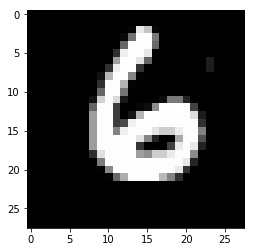

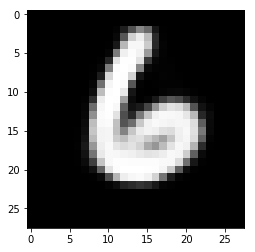

(13200, 27.21105, 17.16144, 10.049609)


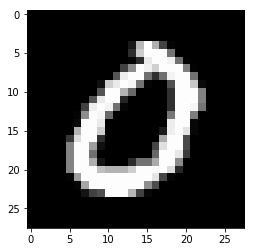

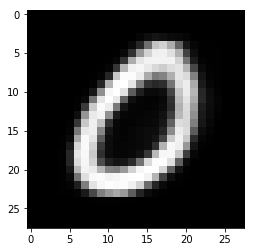

(13400, 26.605186, 16.370886, 10.234302)


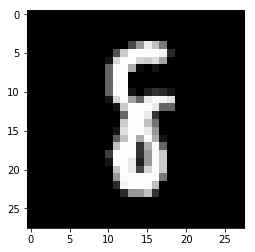

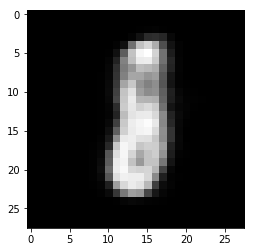

(13600, 29.676254, 19.430946, 10.245304)


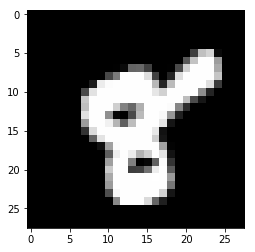

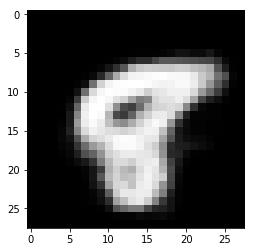

(13800, 29.777557, 19.400959, 10.376597)


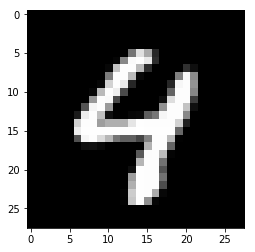

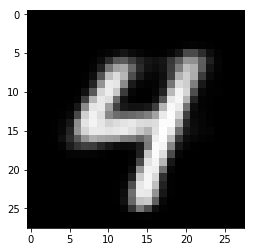

(14000, 28.9212, 18.443666, 10.477533)


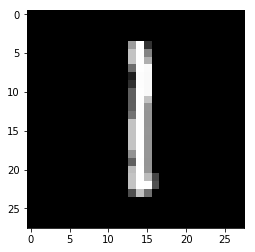

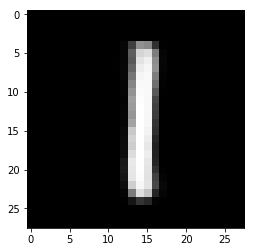

(14200, 29.703451, 19.035486, 10.667965)


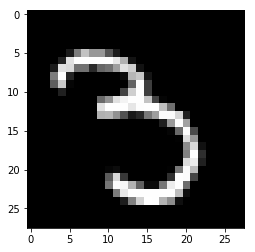

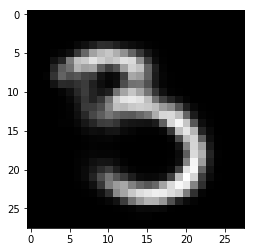

(14400, 29.37232, 18.7075, 10.66482)


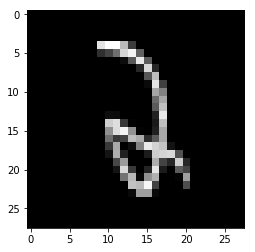

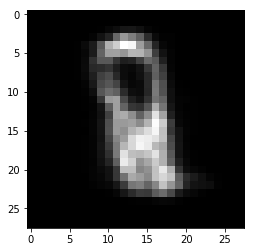

(14600, 29.035236, 18.700436, 10.334801)


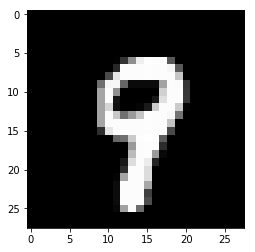

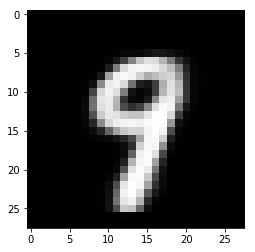

(14800, 26.18636, 15.739271, 10.447088)


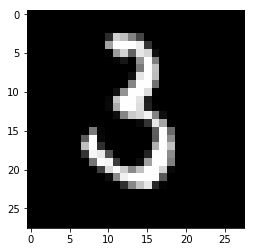

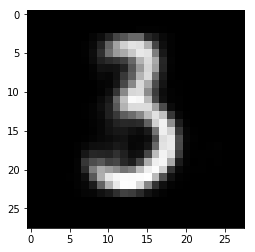

(15000, 26.91998, 16.590096, 10.329882)


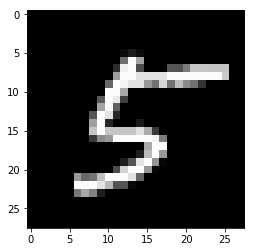

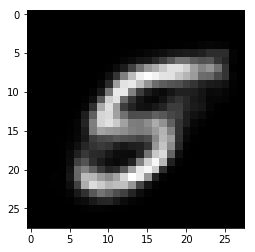

(15200, 30.345488, 19.833282, 10.512205)


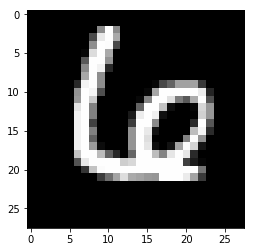

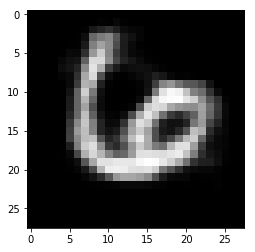

(15400, 26.081173, 15.431389, 10.649783)


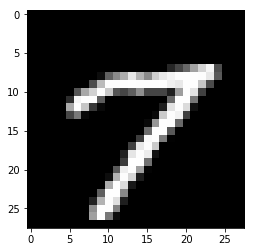

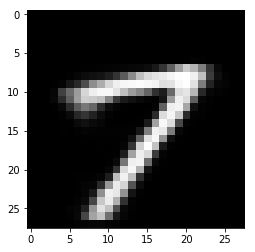

(15600, 30.026646, 19.272717, 10.753931)


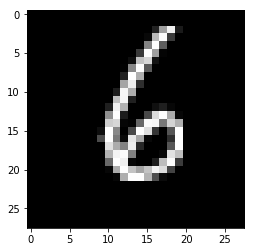

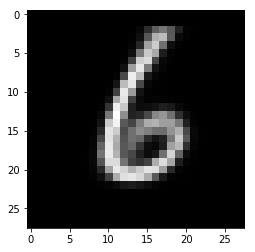

(15800, 27.937328, 17.014774, 10.922552)


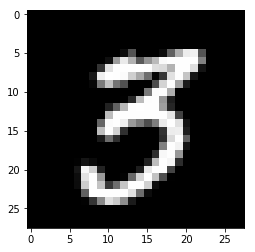

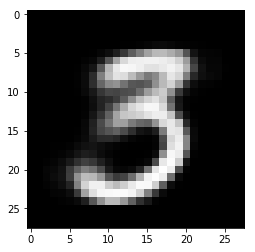

(16000, 28.892368, 18.192513, 10.699856)


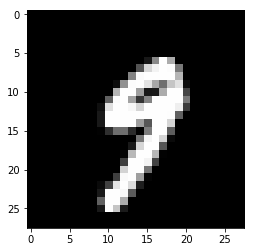

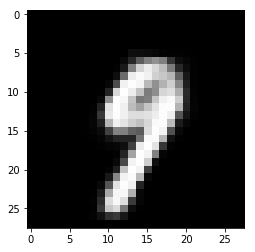

(16200, 28.664272, 18.299404, 10.364868)


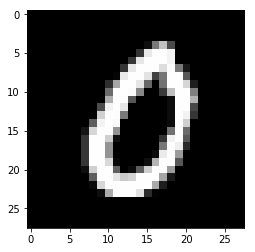

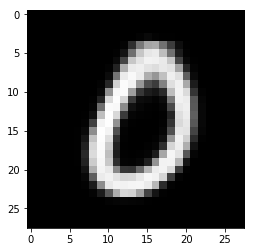

(16400, 28.22227, 17.571825, 10.650442)


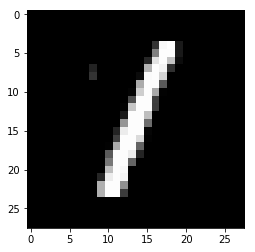

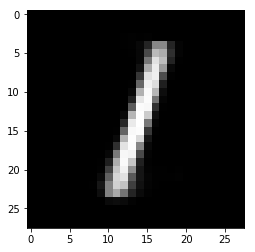

(16600, 28.8462, 18.454271, 10.39193)


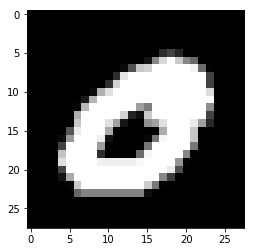

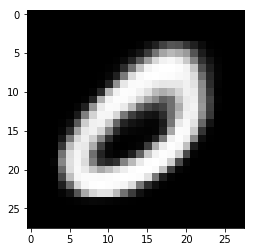

(16800, 29.46045, 18.994371, 10.466078)


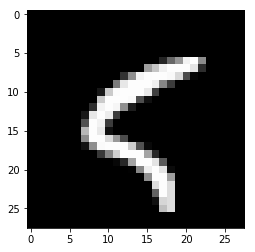

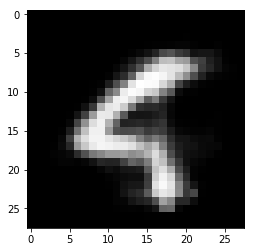

(17000, 27.259478, 16.380413, 10.879065)


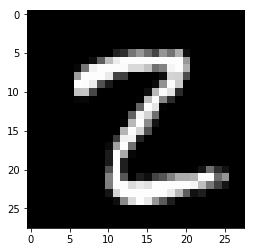

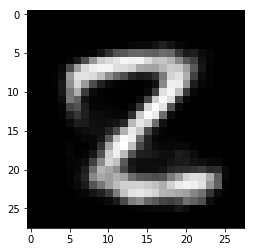

(17200, 28.188091, 17.25562, 10.932472)


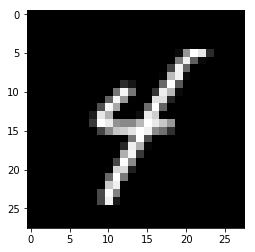

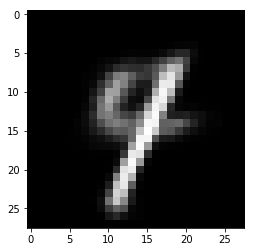

(17400, 29.20832, 18.35635, 10.851971)


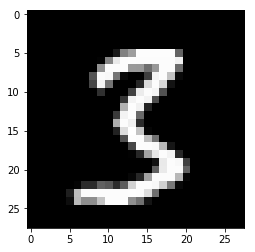

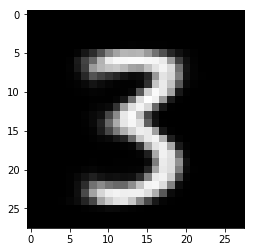

(17600, 25.518167, 15.192415, 10.325752)


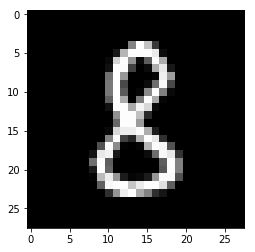

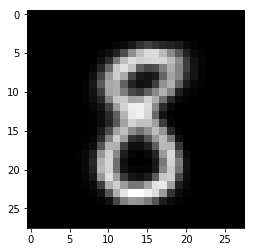

(17800, 27.886448, 17.54068, 10.345768)


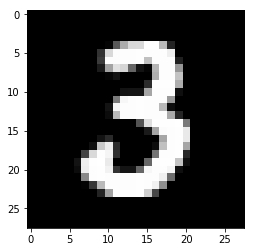

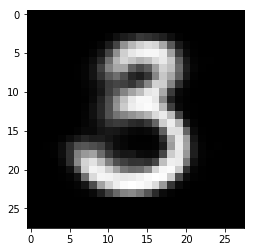

(18000, 27.642986, 17.361599, 10.281389)


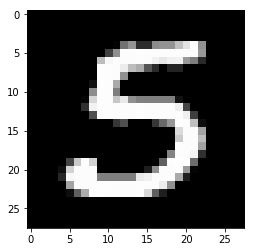

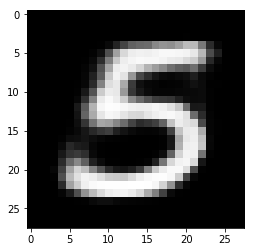

(18200, 27.279552, 17.34315, 9.936403)


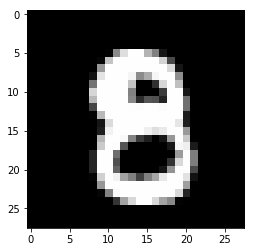

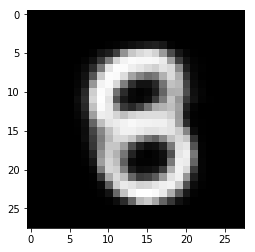

(18400, 27.724693, 17.251564, 10.473129)


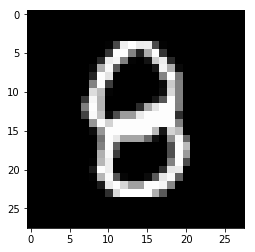

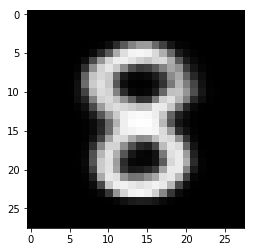

(18600, 27.091558, 16.466398, 10.62516)


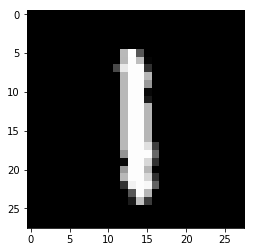

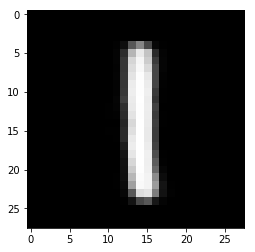

(18800, 27.176838, 16.684162, 10.492676)


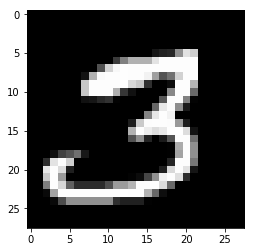

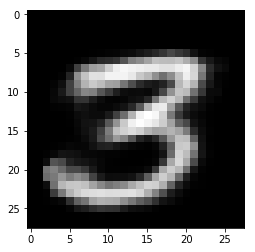

(19000, 26.826946, 16.15673, 10.670214)


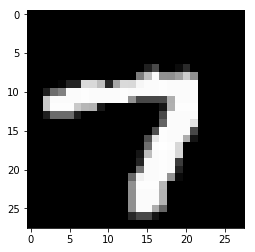

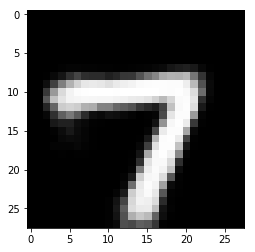

(19200, 28.452663, 17.39278, 11.059885)


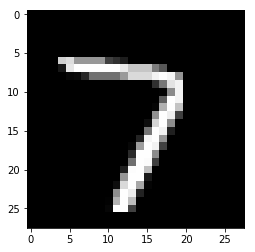

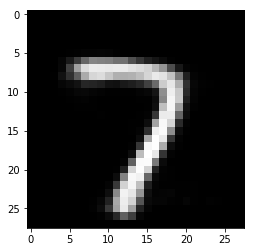

(19400, 25.787184, 15.119527, 10.667656)


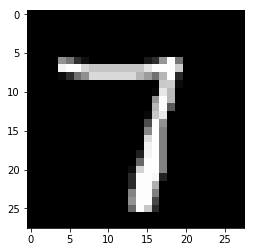

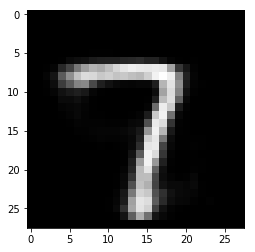

(19600, 27.050907, 16.68826, 10.362648)


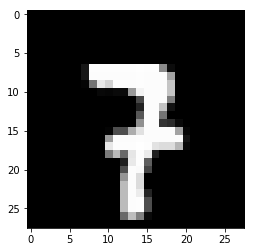

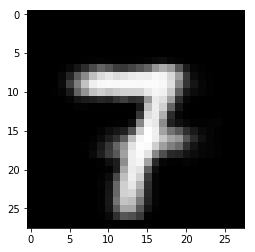

(19800, 26.34349, 15.640165, 10.703324)


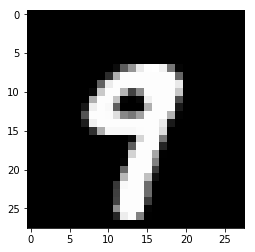

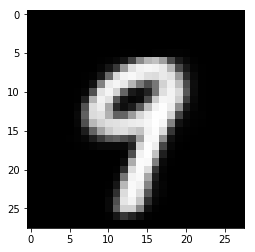

(20000, 26.114588, 15.142441, 10.972146)


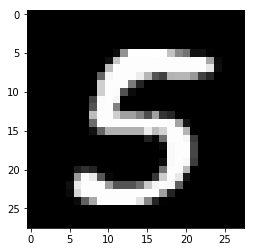

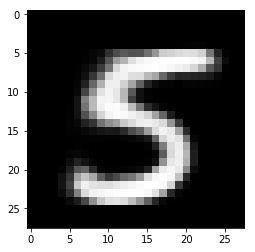

(20200, 28.122028, 17.552147, 10.569882)


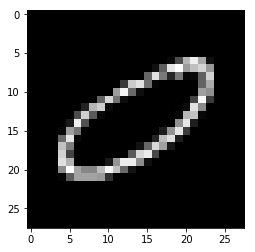

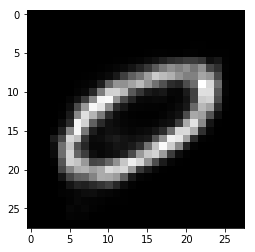

(20400, 27.40673, 16.89153, 10.515203)


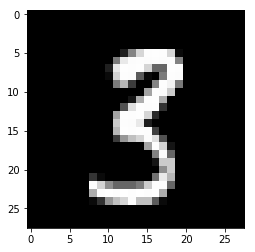

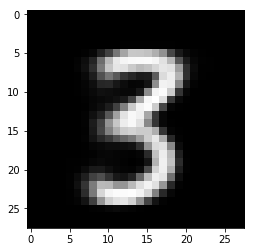

(20600, 27.16708, 16.259354, 10.907726)


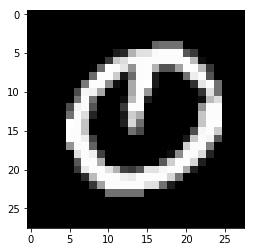

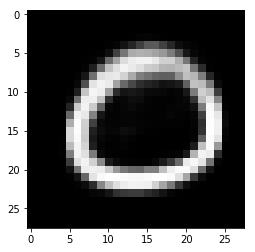

(20800, 26.59533, 16.251087, 10.344244)


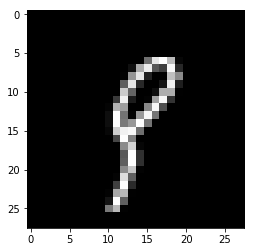

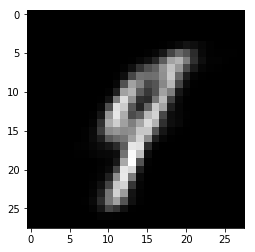

(21000, 26.608562, 16.46733, 10.141232)


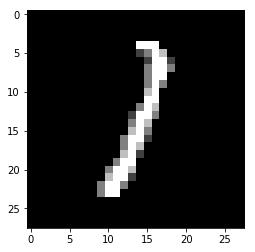

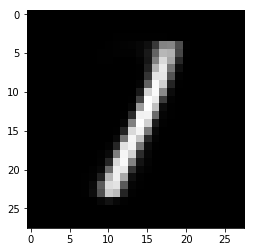

(21200, 26.67793, 15.872906, 10.805025)


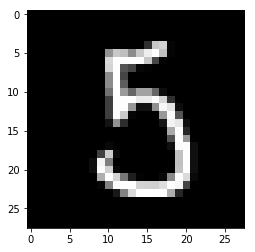

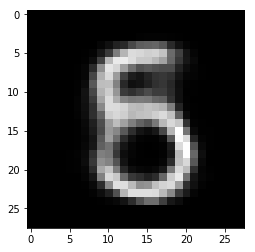

(21400, 26.73584, 16.3713, 10.36454)


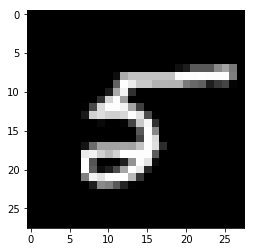

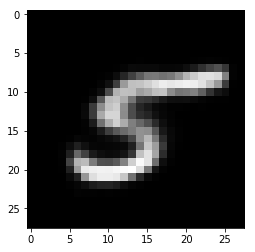

(21600, 26.663242, 16.272116, 10.391126)


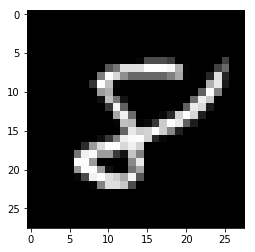

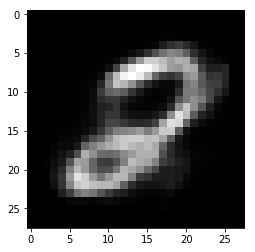

(21800, 27.466803, 16.846327, 10.620476)


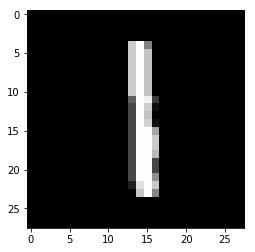

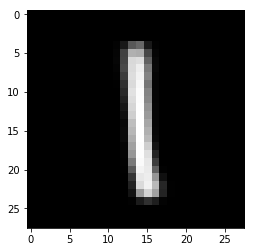

(22000, 27.461731, 16.526964, 10.934768)


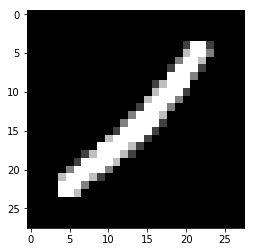

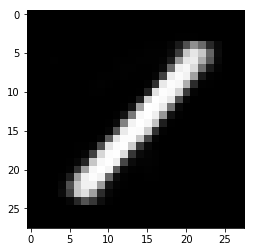

(22200, 27.830574, 16.966133, 10.864441)


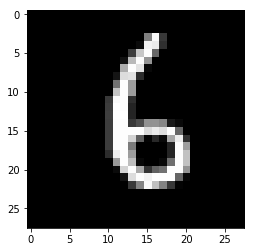

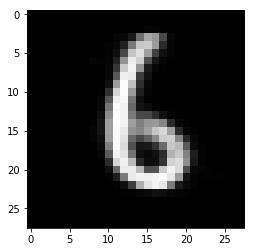

(22400, 27.793968, 17.379776, 10.414193)


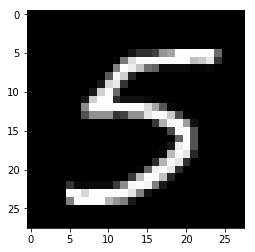

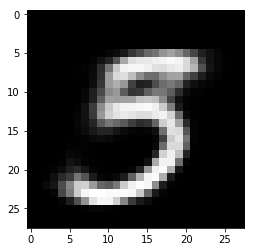

(22600, 27.756638, 16.90663, 10.850008)


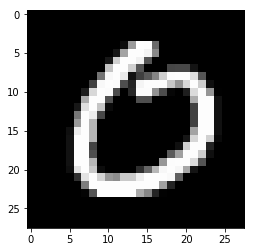

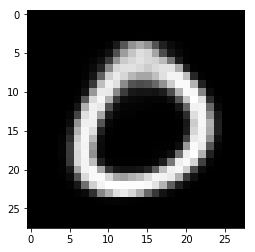

(22800, 28.42343, 17.33611, 11.087319)


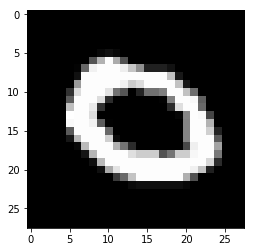

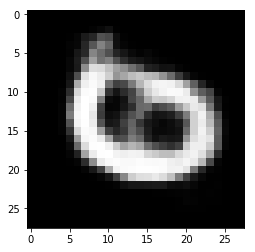

(23000, 27.739063, 17.263706, 10.475359)


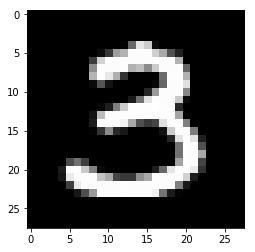

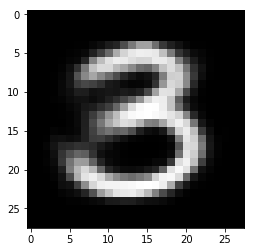

(23200, 27.881275, 16.78522, 11.096054)


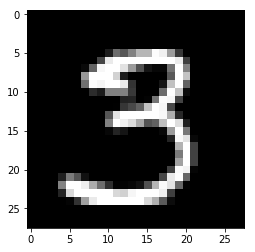

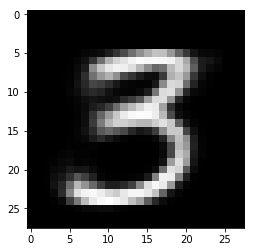

(23400, 28.531036, 17.516716, 11.014322)


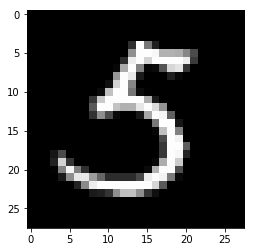

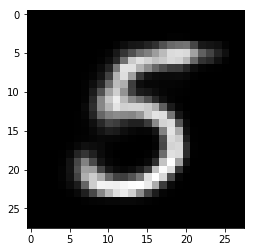

(23600, 27.11575, 16.05421, 11.061537)


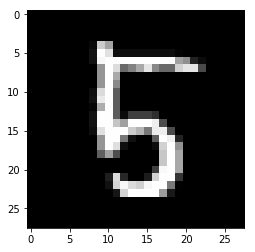

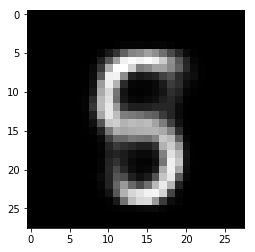

(23800, 26.934368, 16.502468, 10.431903)


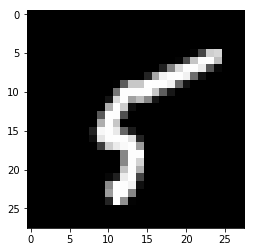

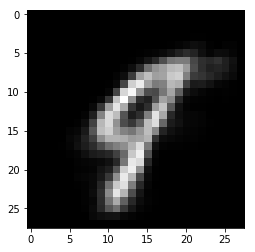

(24000, 27.071991, 16.679083, 10.392908)


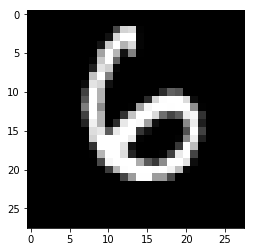

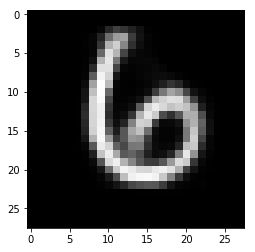

(24200, 28.37516, 17.244247, 11.130913)


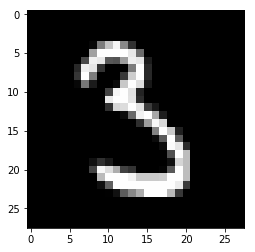

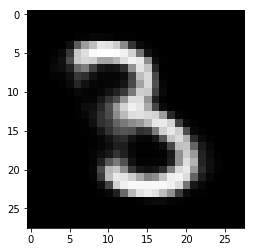

(24400, 28.97766, 17.872349, 11.10531)


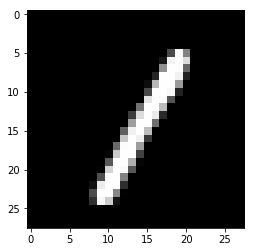

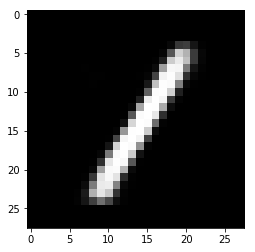

(24600, 26.730083, 16.072922, 10.657161)


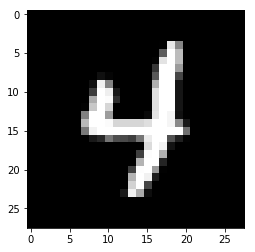

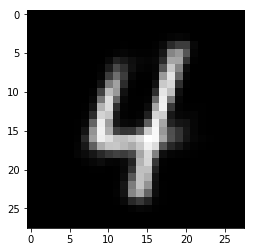

(24800, 24.928068, 14.76008, 10.167987)


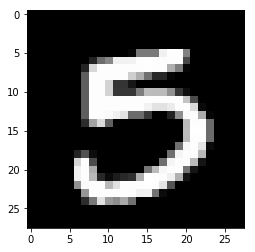

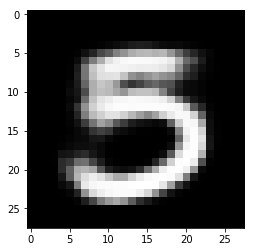

(25000, 26.815857, 16.333439, 10.482418)


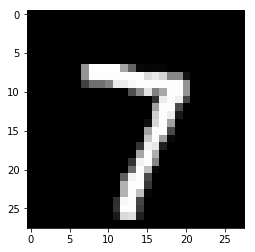

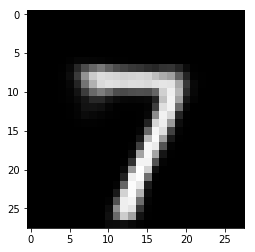

(25200, 25.364801, 14.781229, 10.583572)


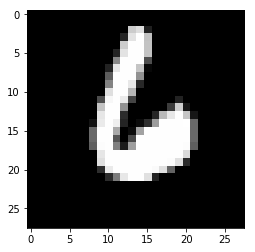

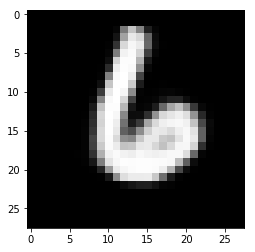

(25400, 26.402668, 16.107439, 10.295228)


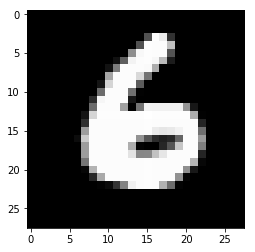

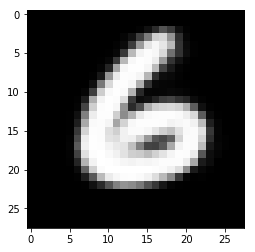

(25600, 25.805122, 14.99452, 10.810602)


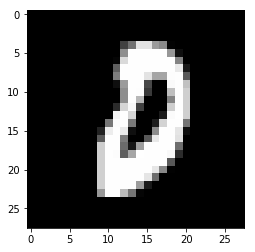

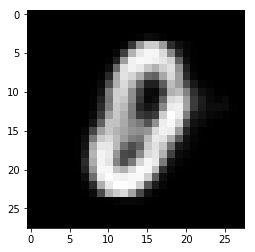

(25800, 26.636753, 16.054604, 10.582151)


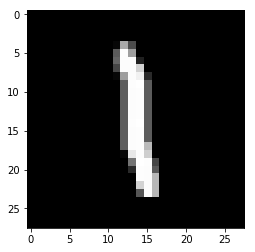

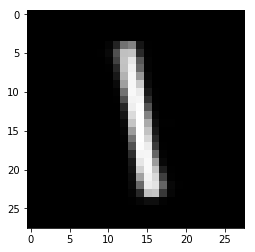

(26000, 25.54359, 14.427906, 11.115683)


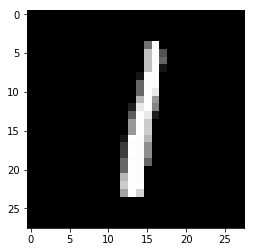

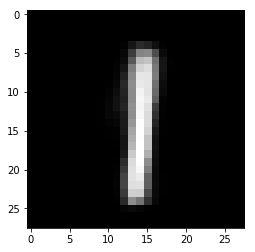

(26200, 25.994408, 15.021067, 10.973341)


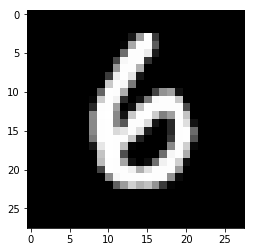

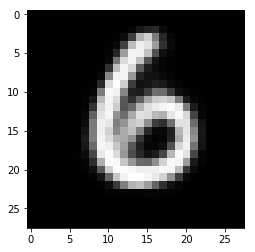

(26400, 27.35731, 16.54794, 10.809368)


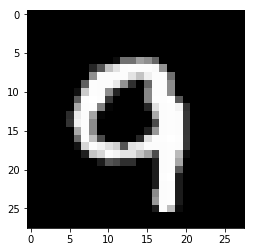

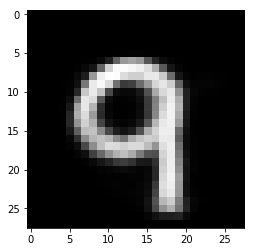

(26600, 25.639366, 15.198545, 10.44082)


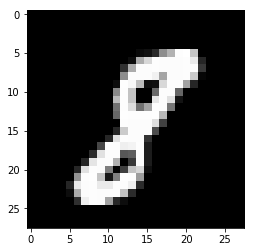

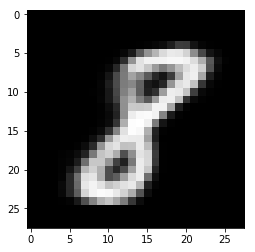

(26800, 26.806183, 15.431974, 11.374207)


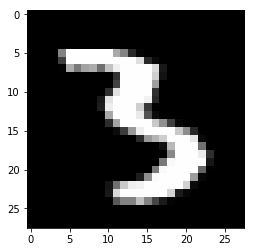

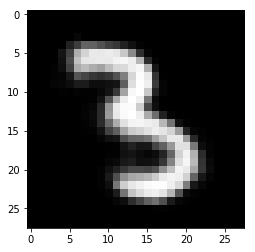

(27000, 27.32085, 16.257168, 11.063685)


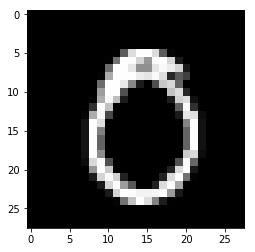

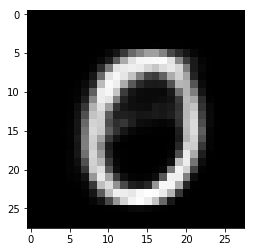

(27200, 28.708866, 17.69878, 11.010086)


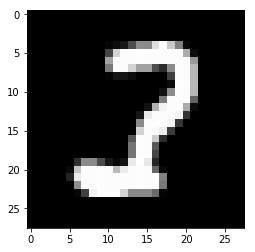

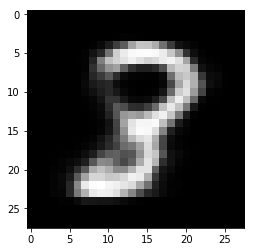

(27400, 27.350933, 16.236595, 11.11434)


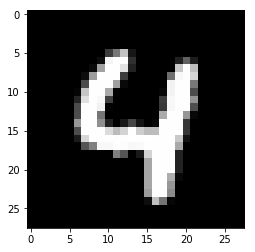

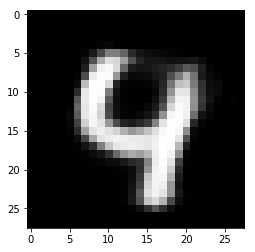

(27600, 27.111874, 15.764417, 11.347457)


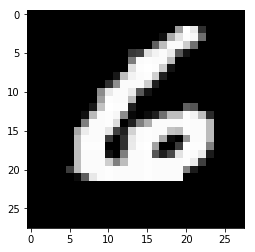

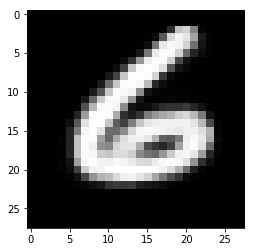

(27800, 25.636944, 14.69931, 10.937633)


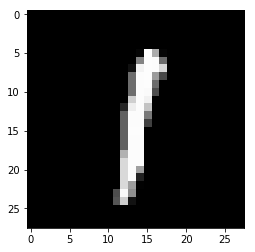

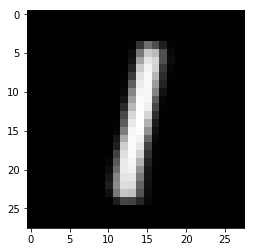

(28000, 27.35212, 16.477264, 10.874854)


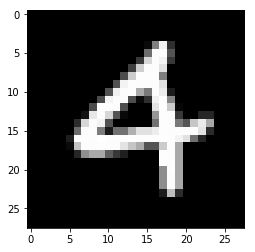

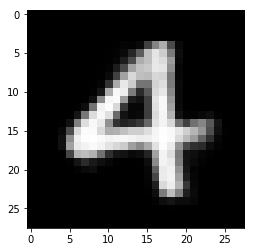

(28200, 26.026094, 15.720949, 10.305145)


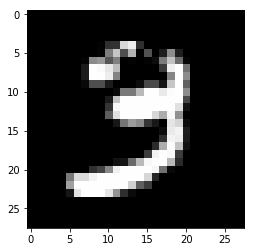

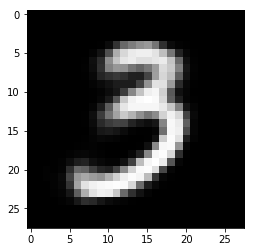

(28400, 25.664139, 15.165208, 10.498932)


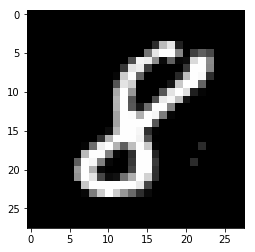

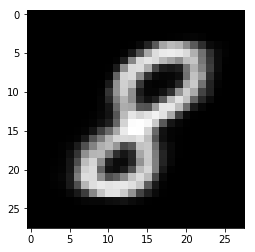

(28600, 27.589012, 16.885479, 10.703533)


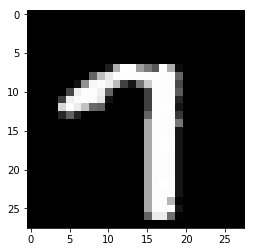

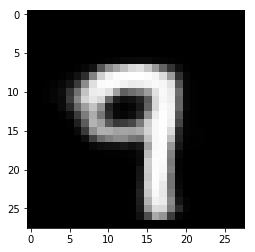

(28800, 26.420778, 16.443886, 9.976894)


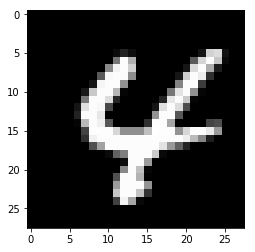

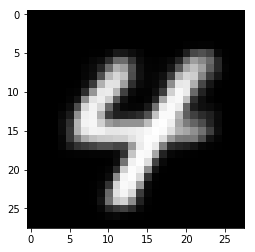

(29000, 26.692783, 16.082657, 10.6101265)


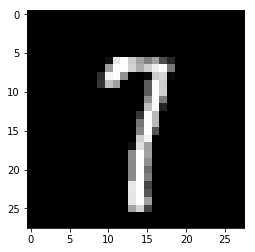

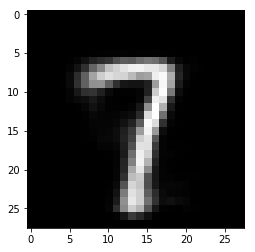

(29200, 26.605406, 15.766596, 10.838808)


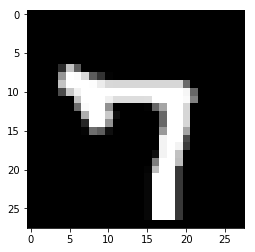

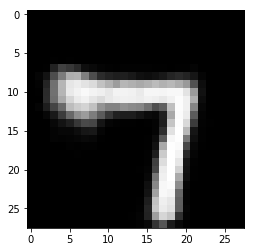

(29400, 26.641605, 15.353926, 11.28768)


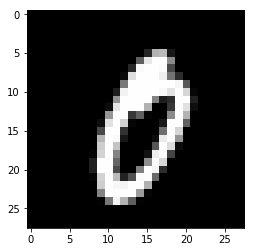

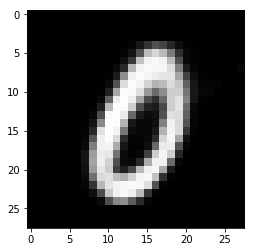

(29600, 27.743656, 16.757908, 10.985748)


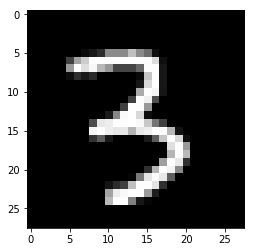

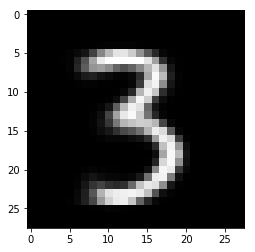

(29800, 25.836216, 15.354723, 10.481493)


In [12]:
# Finally we can train the network
for i in range(30000):
    batch = [np.reshape(b, [28, 28]) for b in mnist.train.next_batch(batch_size=batch_size)[0]]
    sess.run(optimizer, feed_dict={X_in: batch, Y: batch, keep_prob: 0.8})
    
    if not i%200:
        ls, d, i_ls, d_ls, mu, sigm = sess.run([loss, dec, img_loss, latent_loss, mn, sd], feed_dict = {X_in: batch, Y: batch, keep_prob:1.0})
        plt.imshow(np.reshape(batch[0], [28,28]), cmap='gray')
        plt.show()
        plt.imshow(d[0], cmap='gray')
        plt.show()
        print(i, ls, np.mean(i_ls), np.mean(d_ls))

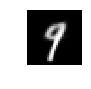

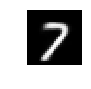

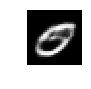

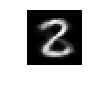

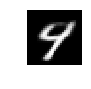

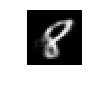

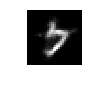

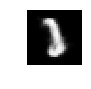

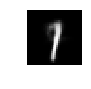

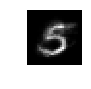

In [14]:
# Generate some new data from the VAE

randoms = [np.random.normal(0, 1, n_latent) for _ in range(10)]
imgs = sess.run(dec, feed_dict={sampled:randoms, keep_prob:1.0})
imgs = [np.reshape(imgs[i], [28,28]) for i in range(len(imgs))]

for img in imgs:
    plt.figure(figsize=(1,1))
    plt.axis('off')
    plt.imshow(img, cmap='gray')